In [1]:
# Import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD 
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks



In [2]:
# Load the CSV files (train and test)

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows to confirm the structure of the data
print(train_df.head())
print(test_df.head())

  image_names  emergency_or_not
0    1503.jpg                 0
1    1420.jpg                 0
2    1764.jpg                 0
3    1356.jpg                 0
4    1117.jpg                 0
  image_names
0    1960.jpg
1     668.jpg
2    2082.jpg
3     808.jpg
4    1907.jpg


In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

train_folder_path = r"C:/Users/Aishwarya/OneDrive - hull.ac.uk/Understanding_AI/train"
image_name = train_df['image_names'].iloc[0]
image_path = train_folder_path + "/" + image_name  # Correct path combination
print(f"Image Path: {image_path}")

# Load and display the image
img = load_img(image_path, target_size=(150, 150))  # Resize to 150x150 pixels
img_array = img_to_array(img)  # Convert the image to a numpy array

# Display the image's shape and show it
print(f"Image Shape: {img_array.shape}")


Image Path: C:/Users/Aishwarya/OneDrive - hull.ac.uk/Understanding_AI/train/1503.jpg
Image Shape: (150, 150, 3)


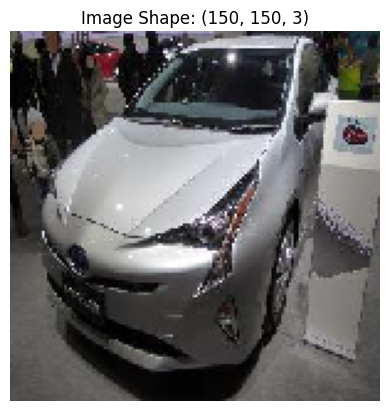

In [4]:
# Display the image and its shape
plt.imshow(img_array / 255.0)  # Normalize the pixel values
plt.title(f"Image Shape: {img_array.shape}")
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [5]:
#Define paths
train_folder_path = r"C:/Users/Aishwarya/OneDrive - hull.ac.uk/Understanding_AI/train"
test_folder_path = r"C:/Users/Aishwarya/OneDrive - hull.ac.uk/Understanding_AI/test"

In [6]:
# Function to load and preprocess images
def load_and_preprocess_images(df, folder_path, target_size=(150, 150)):
    images = []
    labels = []
    
    for i in range(len(df)):
        image_name = df['image_names'].iloc[i]
        image_path = os.path.join(folder_path, image_name)  # Correct path combination
        
        # Load and resize the image
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)  # Convert image to numpy array
        # Normalize the image to [0, 1] by dividing by 255
        img_array = img_array / 255.0
        
        # Append image and label (if available)
        images.append(img_array)
        
        # Check if label exists (train data)
        if 'emergency_or_not' in df.columns:
            label = df['emergency_or_not'].iloc[i]
            labels.append(label)
    
    images = np.array(images)
    if labels:
        labels = np.array(labels)
        return images, labels
    return images

In [7]:
# Load training data (images + labels)
X_train, y_train = load_and_preprocess_images(train_df, train_folder_path)

# Load testing data (images only)
X_test = load_and_preprocess_images(test_df, test_folder_path)

# Verify the shapes of the data
print(f"Training Images Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Images Shape: {X_test.shape}")

Training Images Shape: (1646, 150, 150, 3)
Training Labels Shape: (1646,)
Testing Images Shape: (706, 150, 150, 3)


#### CNN Architecture

In [11]:
#Defining CNN Model
def cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    
    # First convolutional layer with max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the 3D outputs to 1D
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    
    # Output layer with a single neuron for binary classification (emergency vs non-emergency)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
model = cnn_model()
# Display the model summary to check the architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 292ms/step - accuracy: 0.5994 - loss: 0.7682 - val_accuracy: 0.7303 - val_loss: 0.5108
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 291ms/step - accuracy: 0.7386 - loss: 0.5293 - val_accuracy: 0.8000 - val_loss: 0.4593
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.8181 - loss: 0.4287 - val_accuracy: 0.7970 - val_loss: 0.4179
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 299ms/step - accuracy: 0.8368 - loss: 0.3816 - val_accuracy: 0.7212 - val_loss: 0.5809
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 294ms/step - accuracy: 0.8261 - loss: 0.3625 - val_accuracy: 0.8030 - val_loss: 0.5152
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.8782 - loss: 0.2787 - val_accuracy: 0.8333 - val_loss: 0.5401
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.9186 - loss: 0.2130 - val_accuracy: 0.8545 - val_loss: 0.4073
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 308ms/step - accuracy: 0.9444 - loss: 0.1349 - val_accu

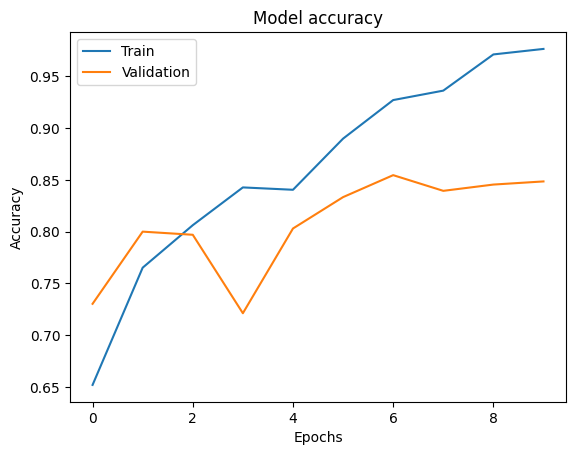

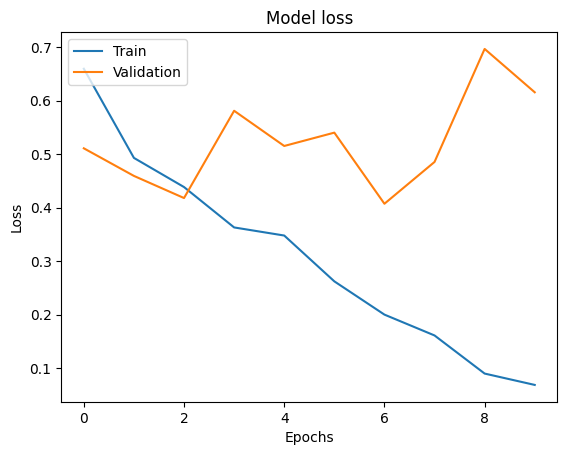

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#### Hyperparameter Tunning

##### Dropout rate 

In [13]:
def create_cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    
    # First convolutional layer with max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Second convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Third convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the 3D outputs to 1D
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.50))
    
    # Output layer with a single neuron for binary classification (emergency vs non-emergency)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
model = create_cnn_model()

# Display the model summary to check the architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,193 (4.73 MB)

 Trainable params: 1,240,193 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 18s 321ms/step - accuracy: 0.5673 - loss: 0.7204 - val_accuracy: 0.7030 - val_loss: 0.5698
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 301ms/step - accuracy: 0.6767 - loss: 0.5730 - val_accuracy: 0.7727 - val_loss: 0.4905
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 286ms/step - accuracy: 0.7657 - loss: 0.5225 - val_accuracy: 0.7333 - val_loss: 0.4898
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 299ms/step - accuracy: 0.7490 - loss: 0.5200 - val_accuracy: 0.7818 - val_loss: 0.4468
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 13s 311ms/step - accuracy: 0.7490 - loss: 0.4897 - val_accuracy: 0.7879 - val_loss: 0.4079
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 285ms/step - accuracy: 0.8093 - loss: 0.4017 - val_accuracy: 0.8030 - val_loss: 0.4330
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 12s 287ms/step - accuracy: 0.8208 - loss: 0.3831 - val_accuracy: 0.7970 - val_loss: 0.5088
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 305ms/step - accuracy: 0.8268 - loss: 0.3591 - val_accu

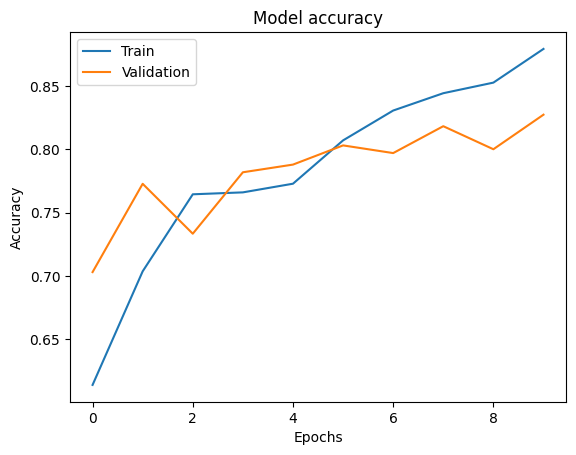

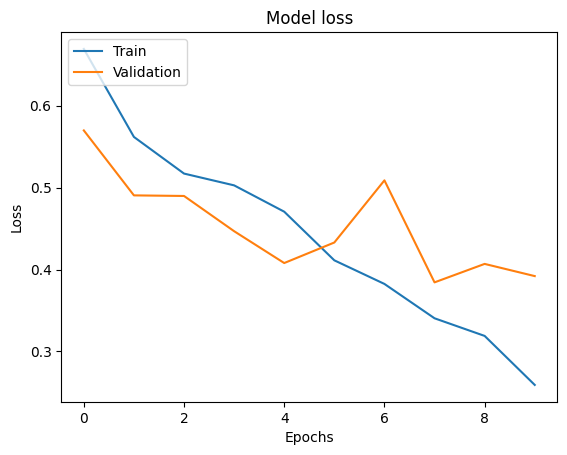

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##### Batch normalisation

In [15]:
def create_cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    
    # First convolutional layer with max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization(momentum = 0.9))
    
    # Second convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization(momentum = 0.9))
    # Third convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(BatchNormalization(momentum = 0.9))
    
    # Flatten the 3D outputs to 1D
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.50))
    
    # Output layer with a single neuron for binary classification (emergency vs non-emergency)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
model = create_cnn_model()

# Display the model summary to check the architecture
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,833 (4.73 MB)

 Trainable params: 1,240,513 (4.73 MB)

 Non-trainable params: 320 (1.25 KB)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 339ms/step - accuracy: 0.6682 - loss: 1.0224 - val_accuracy: 0.7697 - val_loss: 0.5399
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 334ms/step - accuracy: 0.7934 - loss: 0.4805 - val_accuracy: 0.7667 - val_loss: 0.5382
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.8254 - loss: 0.3954 - val_accuracy: 0.8152 - val_loss: 0.4615
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 331ms/step - accuracy: 0.8699 - loss: 0.3270 - val_accuracy: 0.8121 - val_loss: 0.5510
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 337ms/step - accuracy: 0.9023 - loss: 0.2493 - val_accuracy: 0.8242 - val_loss: 0.6147
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.9102 - loss: 0.1874 - val_accuracy: 0.8364 - val_loss: 0.5348
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 14s 331ms/step - accuracy: 0.9498 - loss: 0.1294 - val_accuracy: 0.7576 - val_loss: 0.8092
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step - accuracy: 0.9292 - loss: 0.1544 - val_accu

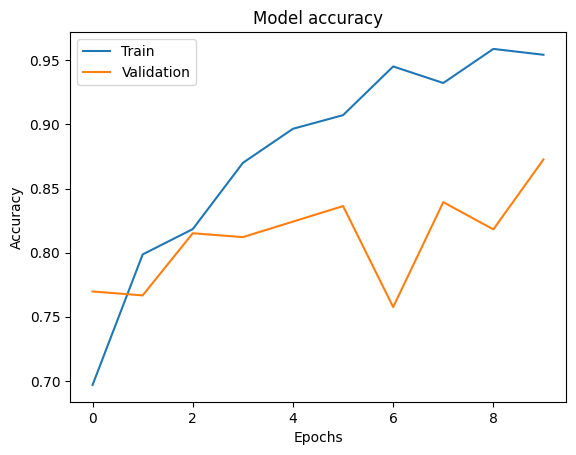

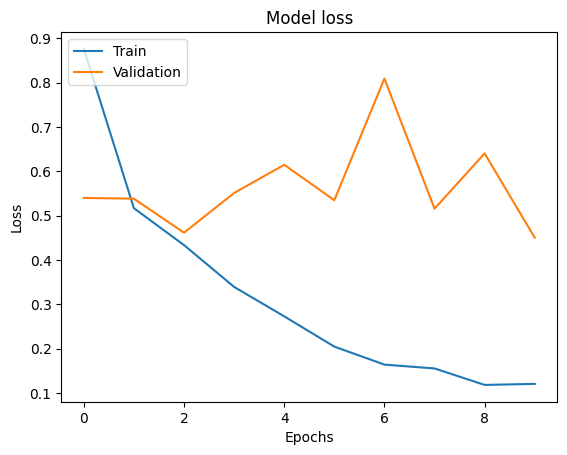

In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


##### Stride and padding

In [17]:
def create_cnn_model(input_shape=(150, 150, 3)):
    model = models.Sequential()
    
    # First convolutional layer with max pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', strides = (2, 2), padding = "same", input_shape=input_shape))
    model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
    
    # Second convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
    
    # Third convolutional layer with max pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
    
    # Flatten the 3D outputs to 1D
    model.add(layers.Flatten())
    
    # Fully connected layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(Dropout(0.50))
    
    # Output layer with a single neuron for binary classification (emergency vs non-emergency)
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Create the model
model = create_cnn_model()

# Display the model summary to check the architecture
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 36, 36, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 318,593 (1.22 MB)

 Trainable params: 318,593 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 99ms/step - accuracy: 0.5872 - loss: 0.6874 - val_accuracy: 0.7212 - val_loss: 0.5798
Epoch 2/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.7040 - loss: 0.6040 - val_accuracy: 0.7545 - val_loss: 0.5117
Epoch 3/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7446 - loss: 0.5556 - val_accuracy: 0.7909 - val_loss: 0.4463
Epoch 4/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.7427 - loss: 0.4992 - val_accuracy: 0.8152 - val_loss: 0.4124
Epoch 5/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.7897 - loss: 0.4729 - val_accuracy: 0.8273 - val_loss: 0.3770
Epoch 6/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.8121 - loss: 0.4283 - val_accuracy: 0.8182 - val_loss: 0.3999
Epoch 7/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - accuracy: 0.8485 - loss: 0.4149 - val_accuracy: 0.8242 - val_loss: 0.3685
Epoch 8/10
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.8509 - loss: 0.3514 - val_accuracy: 0.8485 - 

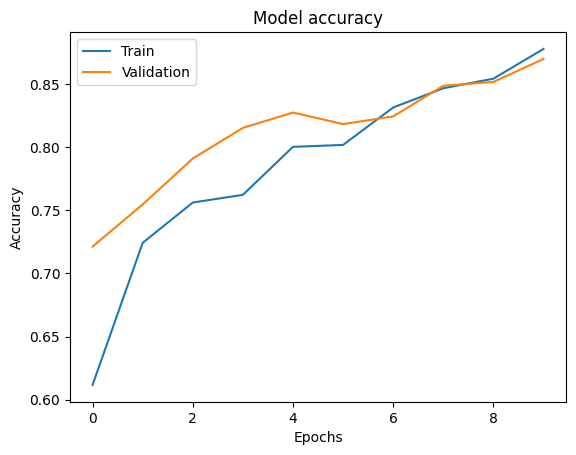

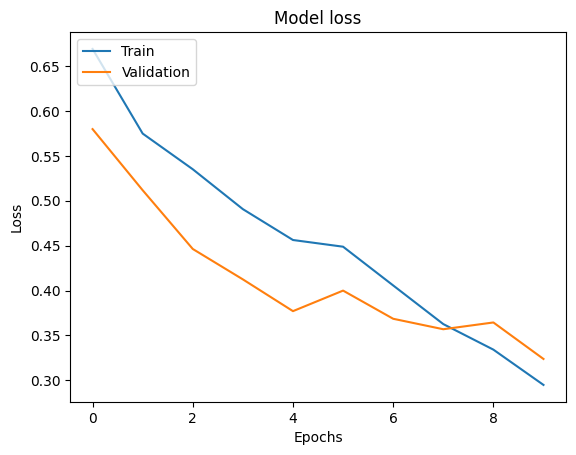

In [18]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
